In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("Diabetes.csv")


In [5]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [5]:
df = df.drop(['DiabetesPedigreeFunction'],axis = 1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [6]:
df = df.rename(columns={"BloodPressure":"BP", "SkinThickness":"SkinThick"})
df.head()

,Pregnancies,Glucose,BP,SkinThick,Insulin,BMI,Age,Outcome
0,6,148,72,35,0,33.6,50,1
1,1,85,66,29,0,26.6,31,0
2,8,183,64,0,0,23.3,32,1
3,1,89,66,23,94,28.1,21,0
4,0,137,40,35,168,43.1,33,1


In [7]:
print(df.shape)

(768, 8)


In [8]:
df.size

6144

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ",duplicate_rows_df.shape[0])

number of duplicate rows:  0


In [10]:
df.count()

Pregnancies    768
Glucose        768
BP             768
SkinThick      768
Insulin        768
BMI            768
Age            768
Outcome        768
dtype: int64

In [11]:
df = df.drop_duplicates()
df.count()

Pregnancies    768
Glucose        768
BP             768
SkinThick      768
Insulin        768
BMI            768
Age            768
Outcome        768
dtype: int64

In [12]:
df.isnull().sum()

Pregnancies    0
Glucose        0
BP             0
SkinThick      0
Insulin        0
BMI            0
Age            0
Outcome        0
dtype: int64

In [13]:
df = df.dropna()
df.count()

Pregnancies    768
Glucose        768
BP             768
SkinThick      768
Insulin        768
BMI            768
Age            768
Outcome        768
dtype: int64

/home/hk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age'>

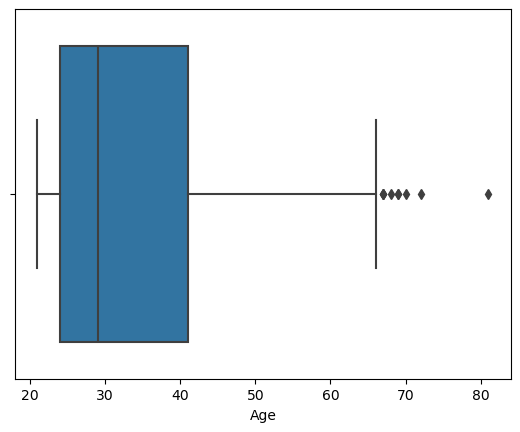

In [14]:
sns.boxplot(data=df, x = "Age")

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Pregnancies      5.00
Glucose         41.25
BP              18.00
SkinThick       32.00
Insulin        127.25
BMI              9.30
Age             17.00
Outcome          1.00
dtype: float64


(664, 8)


/home/hk/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Age'>

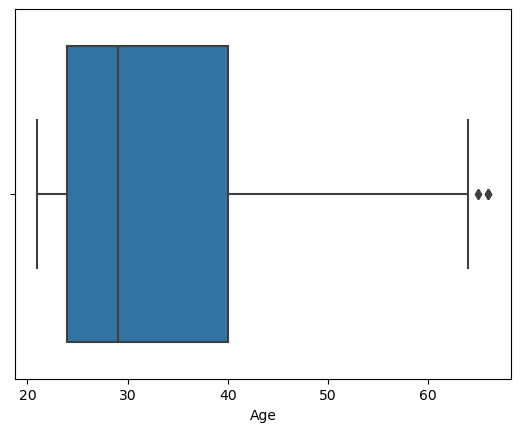

In [24]:
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print(df.shape)
sns.boxplot(data = df, x ="Age")


Text(0.5, 0, 'Age')

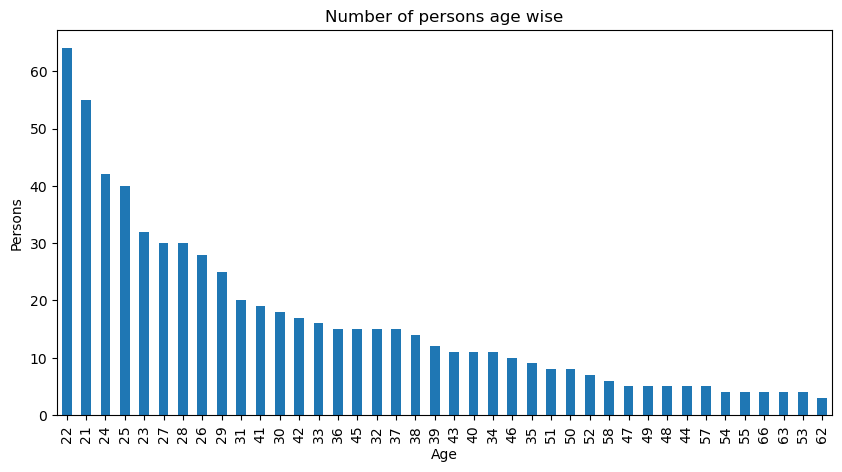

In [25]:
df.Age.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))
plt.title("Number of persons age wise")
plt.ylabel("Persons")
plt.xlabel("Age")

<Axes: >

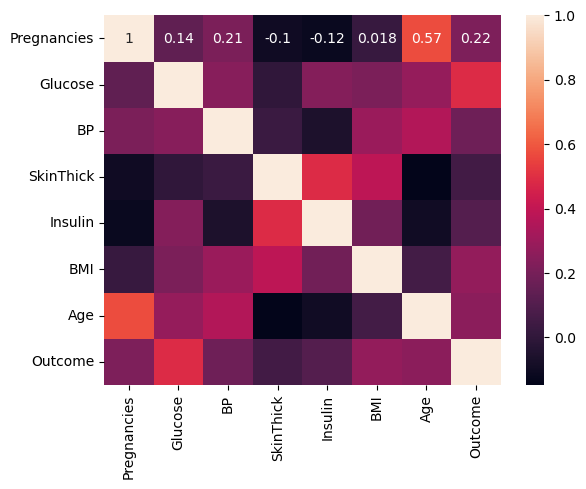

In [26]:
sns.heatmap(data = df.corr(),annot = True)